In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1 Oxford pet Dataset 소개

인공지능 프로젝트를 개발하는 데 가장 중요한 것은 우선 데이터를 찾고 전처리하는 작업이다.

### 2 Oxford pet Dataset 코드 읽어 오기

코랩 서버에 데이터를 업로드하고 데이터 세트에 대한 시각화 및 정보를 출력해 보자.

1. 데이터 다운로드 및 압축 풀기

In [ ]:
# !sudo apt-get install unzip

In [4]:
import gdown
url = 'https://drive.google.com/file/d/1USSTL8IlR_gux_FAPFI4wpOkEdanxgPZ'
fname = 'oxford_pet.zip'
gdown.download(url, fname, quiet=False)
!unzip -qq /content/drive/MyDrive/oxford_pet.zip

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1USSTL8IlR_gux_FAPFI4wpOkEdanxgPZ
To: /content/oxford_pet.zip
8.90kB [00:00, 13.8MB/s]


In [5]:
!unzip /content/drive/MyDrive/oxford_pet.zip -d /content/

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/images/Persian_187.jpg  
  inflating: /content/images/boxer_126.jpg  
  inflating: /content/images/saint_bernard_178.jpg  
  inflating: /content/images/havanese_189.jpg  
  inflating: /content/images/keeshond_123.jpg  
  inflating: /content/images/english_cocker_spaniel_112.jpg  
  inflating: /content/images/pomeranian_174.jpg  
  inflating: /content/images/american_pit_bull_terrier_112.jpg  
  inflating: /content/images/Sphynx_23.jpg  
  inflating: /content/images/havanese_8.jpg  
  inflating: /content/images/pomeranian_43.jpg  
  inflating: /content/images/Bombay_30.jpg  
  inflating: /content/images/english_cocker_spaniel_42.jpg  
  inflating: /content/images/boxer_28.jpg  
  inflating: /content/images/Bengal_68.jpg  
  inflating: /content/images/american_bulldog_39.jpg  
  inflating: /content/images/keeshond_33.jpg  
  inflating: /content/images/leonberger_192.jpg  
  inflating: /content/images/leonberger_58.jpg  
  inflatin

2. 라이브러리 import하기

pandas, seaborn, matplotlib.pyplot을 import한다.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

3. list.txt파일 읽어 오기

images, annotations 폴더를 업로드하고 데이터 정보가 있는 list,txt 파일을 읽어온다.

In [7]:
df = pd.read_csv('./annotations/list.txt', skiprows=6, delimiter=' ', header=None)

# list.txt 안의 정보대로 파일 이름, id, species, breed 순서로 칼럼을 만들어 준다.
df.columns = ['file_name', 'id', 'species', 'breed']
df

,file_name,id,species,breed
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [8]:
# 고양이와 강아지의 정보 출력하기
print(df['species'].value_counts().sort_index())

species
1    2371
2    4978
Name: count, dtype: int64


4. 그래프로 시각화하기

개인지 고양이인지 구분해 주는 species 속성을 바 그래프로 불러와 개수를 시각화한다.

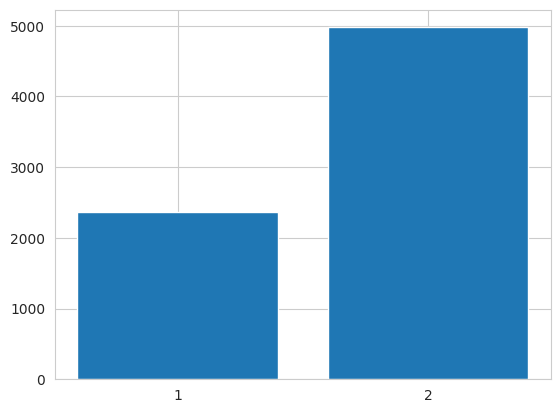

In [9]:
value_counts = df['species'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.show()

5. 다른 파일 읽어 오기 및 경로 설정하기

앞서 설명한 파일들의 경로를 읽어서 파일을 잘 읽어 왔는지 확인한다.

In [10]:
import os
from glob import glob

image_dir = os.path.join('/content/images')
bbox_dir = os.path.join('/content/annotations/xmls')
seg_dir = os.path.join('/content/annotations/trimaps')

image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
len(image_files)

7390

In [11]:
# 파일 확인
image_files[:10]

['Persian_260.jpg',
 'english_setter_24.jpg',
 'great_pyrenees_188.jpg',
 'pomeranian_8.jpg',
 'english_cocker_spaniel_179.jpg',
 'havanese_112.jpg',
 'Russian_Blue_212.jpg',
 'Abyssinian_68.jpg',
 'British_Shorthair_70.jpg',
 'Bombay_125.jpg']

In [12]:
seg_files = glob(seg_dir + '*.png')
len(seg_files)

0

In [13]:
bbox_files = glob(bbox_dir + '*.xml')
len(bbox_files)

0

### 3 head ROI 읽어 오기

개와 고양이 이미지에 바운딩 박스를 표시하고, 개, 고양이 부분과 배경 부부을 색으로 구분해 보자.

1. 라이브러리 import하기

이미지를 읽기 위한 라이브러리와 바운딩 박스를 그리기 위한 라이브러리 및 xml을 다루기 위한 라이브러리를 가져온다.

In [ ]:
# import cv2
# import xml.etree.ElementTree as et
# from matplotlib.patches import Rectangle

2. 바운딩 박스 **그리기**

In [ ]:
# image_path = image_files[110]
# # 저장된 위치를 달리해 불러온다.
# bbox_path = image_path.replace(image_dir, bbox_dir).replace('jgp', 'xml')

# image = cv2.imread(image_path)

# # BGR 형식을 RGB로 바꾼다.
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # xml 파일을 가져와 준다.
# tree = et.parse(bbox_path)

# # 바운딩 박스의 좌표를 가져와 읽어 온다.
# xmin = float(tree.find('./object/bndbox/xmin').text)
# xmax = float(tree.find('./object/bndbox/xmax').text)
# ymin = float(tree.find('./object/bndbox/ymin').text)
# ymax = float(tree.find('./object/bndbox/ymax').text)

# # 바운딩 박스를 그린다.
# rect_x = xmin
# rect_y = ymin
# rect_w = xmax - xmin
# rect_h = ymax - ymin

# rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
# plt.axes().add_patch(rect)
# plt.imshow(image)

# plt.show()

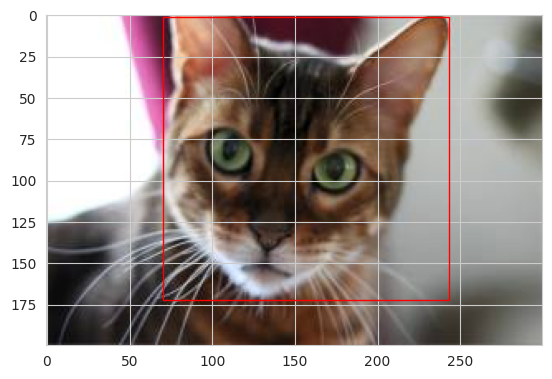

In [14]:
import cv2
import xml.etree.ElementTree as et
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt # Import matplotlib.pyplot
import os # Import os

# Use os.path.join to create the full path to the image
image_path = os.path.join(image_dir, image_files[110])
# 저장된 위치를 달리해 불러온다.
# Correct the typo 'jgp' to 'jpg'
bbox_path = image_path.replace(image_dir, bbox_dir).replace('jpg', 'xml')

image = cv2.imread(image_path)

# Check if the image was loaded successfully.
if image is None:
    print(f"Error: Could not load image from {image_path}. Check the file path and permissions.")
else:
    # BGR 형식을 RGB로 바꾼다.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # xml 파일을 가져와 준다.
    tree = et.parse(bbox_path)

    # 바운딩 박스의 좌표를 가져와 읽어 온다.
    xmin = float(tree.find('./object/bndbox/xmin').text)
    xmax = float(tree.find('./object/bndbox/xmax').text)
    ymin = float(tree.find('./object/bndbox/ymin').text)
    ymax = float(tree.find('./object/bndbox/ymax').text)

    # 바운딩 박스를 그린다.
    rect_x = xmin
    rect_y = ymin
    rect_w = xmax - xmin
    rect_h = ymax - ymin

    rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')

    # Create a figure and axes if they don't exist
    # Removed the check for plt.gca() and explicitly create figure and axes for clarity
    fig, ax = plt.subplots()


    ax.add_patch(rect)
    plt.imshow(image)

    plt.show()

3. segmap 정보 시각화하기

개와 고양이의 구분은 검은색으로, 배경은 빨간색으로, 그 외는 하얀색으로 표현된다.

In [ ]:
# image_path = image_files[110]
# # 확장자를 jpg에서 png로 변경한다.
# seg_path = image_path.replace(image_dir, seg_dir).replace('jpg', 'png')
# # 이미지 읽기
# image = cv2.imread(image_path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# # seg_amp 정보는 일반 이미지와 달리 GRAYSCALE을 사용하여 읽어 와야 한다.
# seg_map = cv2.imgread(seg_path, cv2.IMREAD_GRAYSCALE)

# plt.figure(figsize=(15,15))
# plt.subplot(1, 2, 1)
# plt.imshow(image)
# plt.subplot(1, 2, 2)
# plt.imshow(seg_map)

# plt.show()

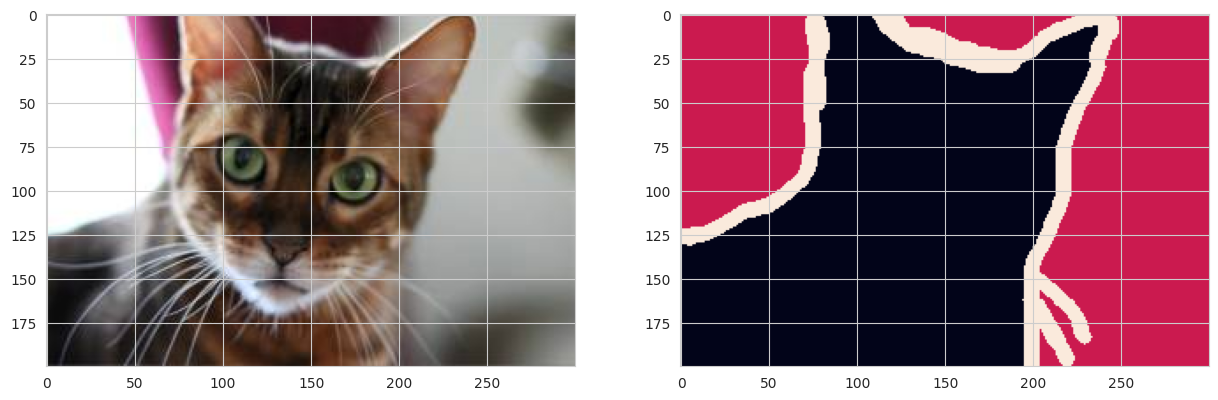

In [15]:
image_path_filename = image_files[110] # Get the filename from the list
# Construct the full path to the image file
image_path = os.path.join(image_dir, image_path_filename)

# 확장자를 jpg에서 png로 변경한다.
seg_path = image_path.replace(image_dir, seg_dir).replace('jpg', 'png')
# 이미지 읽기
image = cv2.imread(image_path)

# Check if image loaded successfully
if image is None:
    print(f"Error: Could not load image from {image_path}. Check the file path and permissions.")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # seg_amp 정보는 일반 이미지와 달리 GRAYSCALE을 사용하여 읽어 와야 한다.
    # Corrected the typo in cv2.imread
    seg_map = cv2.imread(seg_path, cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(15,15))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.imshow(seg_map)

    plt.show()

### 4 KFold 이미지 분류하기

교차 검증을 위해 데이터를 5개의 세트로 나누어 보자.

1. 훈련 데이터와 검증 데이터 나누기

이미지 데이터를 훈련 데이터와 검증 데이터로 나누고 개수를 확인한다.

<aside>
💡 교차 검증을 위해 KFold를 가져온다.   
품종을 균등하게 분포하기 위해 StratifiedKFold를 가져온다.   
데이터를 나눠 준다.   
훈련 데이터와 검증 데이터의 개수를 확인할 수 있다.  

</aside>

1. 데이터 확인 및 저장하기

데이터 비율을 시각화하여 확인한다.

In [ ]:
# value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()

# plt.bar(range(len(value_counts)), value_counts.values, align='center')
# plt.xticks(range(len(value_counts)), value_counts.index.values)

# plt.tight_layout()
# plt.show()

# df.to_csv('./kfolds.csv', index=False)

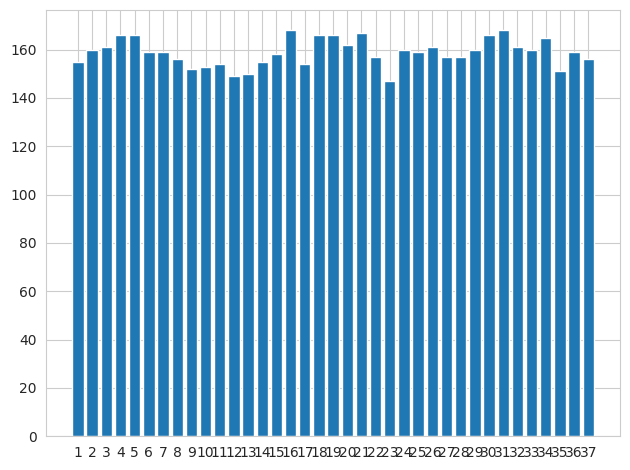

In [16]:
# Import StratifiedKFold for cross-validation
from sklearn.model_selection import StratifiedKFold

# Assuming you want to split the data into 5 folds (as implied by the condition df['fold'] != 5)
n_splits = 5

# Initialize StratifiedKFold. We stratify by 'species' to ensure balanced distribution.
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42) # Added random_state for reproducibility

# Add a 'fold' column to the DataFrame and initialize with -1
df['fold'] = -1

# Iterate through the folds and assign fold numbers
for fold, (train_index, val_index) in enumerate(skf.split(df, df['species'])):
    df.loc[val_index, 'fold'] = fold + 1 # Assign fold number starting from 1

# Now, the 'fold' column exists in the DataFrame and you can proceed with the rest of your code
value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

df.to_csv('./kfolds.csv', index=False)

해당 이미지가 균등하게 뽑혔는지 확인한다.
해당 파일을 csv 파일로 저장한다.